# FINM 35000: Topics in Economics
## Project 1

### Import Statements

In [29]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

### API Key

In [30]:
fred_api_key = '6014571ef89b16f87265e5d0b7644011' 
fred = Fred(api_key=fred_api_key)

### Data Extraction

In [31]:
sentiment_data = pd.read_excel("FOMC_statement_date_sentiment_score.xlsx")
sentiment_data

,Date,Index Score
0,2000-01-19,75.000000
1,2000-03-08,86.046512
2,2000-05-03,89.189189
3,2000-06-14,56.000000
4,2000-08-09,44.680851
...,...,...
165,2024-03-20,69.230769
166,2024-05-01,62.500000
167,2024-06-12,71.428571
168,2024-07-31,71.428571


In [32]:
dfedtar_data = fred.get_series('DFEDTAR')
dfedtaru_data = fred.get_series('DFEDTARU')

fed_data = pd.DataFrame({'DFEDTAR': dfedtar_data, 'DFEDTARU': dfedtaru_data})

cutoff_date = pd.Timestamp('2008-12-15')
fed_data['Target_Rate'] = fed_data.apply(
    lambda row: row['DFEDTAR'] if row.name <= cutoff_date else row['DFEDTARU'], axis=1
)

fed_data = fed_data.drop(columns=['DFEDTAR', 'DFEDTARU'])

fed_data

,Target_Rate
1982-09-27,10.25
1982-09-28,10.25
1982-09-29,10.25
1982-09-30,10.25
1982-10-01,10.00
...,...
2024-10-23,5.00
2024-10-24,5.00
2024-10-25,5.00
2024-10-26,5.00


### Merging Data

In [24]:
fed_data.index = pd.to_datetime(fed_data.index)
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

merged_data = pd.merge(sentiment_data, fed_data, left_on='Date', right_index=True, how='inner')

merged_data['Change_Target_Rate'] = merged_data['Target_Rate'].diff()

merged_data

,Date,Index Score,Target_Rate,Change_Target_Rate
0,2000-01-19,75.000000,5.50,NaN
1,2000-03-08,86.046512,5.75,0.25
2,2000-05-03,89.189189,6.00,0.25
3,2000-06-14,56.000000,6.50,0.50
4,2000-08-09,44.680851,6.50,0.00
...,...,...,...,...
165,2024-03-20,69.230769,5.50,0.00
166,2024-05-01,62.500000,5.50,0.00
167,2024-06-12,71.428571,5.50,0.00
168,2024-07-31,71.428571,5.50,0.00


### Plotting Data

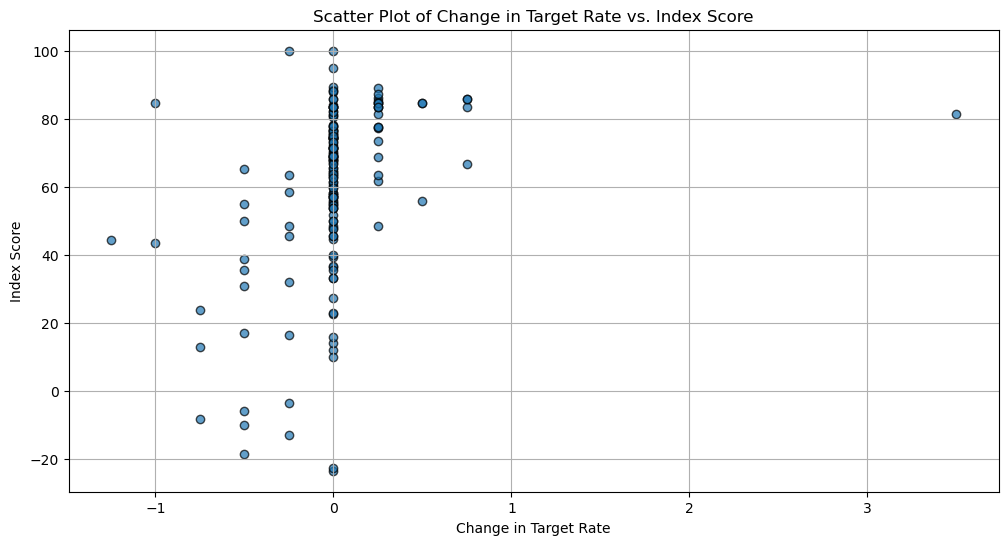

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Change_Target_Rate'], merged_data['Index Score'], alpha=0.7, edgecolor='k')

plt.xlabel('Change in Target Rate')
plt.ylabel('Index Score')
plt.title('Scatter Plot of Change in Target Rate vs. Index Score')

plt.grid()
plt.show()